# 데잇걸즈 Wrap-up

## 음이항 분포

p의 확률 n번 성공할 때까지 몇 번이 필요한가? `numpy.random.negative_binomial`은 결과에 n을 더해줘야함.

In [1]:
import numpy.random

확률이 1인 경우 10번 성공할 때까지 10번이 필요. (0에 10을 더하면 됨)

In [7]:
numpy.random.negative_binomial(10, 1.00, 100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Imputation

결측값이 있을 때 다른 값을 이용해 결측값을 채워넣는 것

In [3]:
import pandas as pd

In [4]:
fire = pd.read_csv('C:/Users/eupho/Downloads/PJT002_train.csv')

C:\Users\eupho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
fire.head()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,133759,2015-10-03 02:33:46,NaN,NaN,3,112.86,112.86,200.0,NaN,1.0,...,N,129,0,0,809,2453,17664,83,0,N
1,96248,2016-11-13 17:05:57,업무시설,철근콘크리트구조,3,721.82,1109.54,0.0,1.9881e+07,5.0,...,N,27,5,1,1731,2561,18136,50,0,N
2,71317,2016-11-21 12:46:36,단독주택,블록구조,4,47.06,47.06,288.0,1.96501e+07,1.0,...,N,273,0,0,825,3964,14944,270,1,N
3,86638,2016-11-07 02:50:14,위험물저장및처리시설,벽돌구조,2,171.45,176.64,1379.0,2.00201e+07,2.0,...,N,109,0,0,1264,2572,15104,132,0,N
4,97748,2014-01-28 16:36:43,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,...,N,739,0,0,10241,100127,5000,5004,0,N


### autoimpute 패키지

설치

In [ ]:
!pip install fancyimpute

불러오기

In [8]:
from autoimpute.imputations import SingleImputer

W1117 16:39:47.848764 27432 blas_headers.py:988] Using NumPy C-API based implementation for BLAS functions.


다른 컬럼을 이용해서 비어있는 컬럼을 채운다.

In [9]:
si = SingleImputer()

시간이 오래 걸리므로 일부 데이터만 사용. 실제로 사용할 때는 id, 날짜 등의 불필요한 컬럼이나 모든 값이 비어있는 컬럼 등은 제거해주어야 한다.

In [12]:
filled = si.fit_transform(fire.iloc[1:100, 3:7])

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


원본 데이터에 비어있던 값이 채워져있음을 볼 수 있다.

In [14]:
filled.head()

,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar
1,철근콘크리트구조,3,721.82,1109.54
2,블록구조,4,47.06,47.06
3,벽돌구조,2,171.45,176.64
4,일반목구조,4,0.00,0.00
5,철근콘크리트구조,15,30351.48,316147.12


## imbalanced data

분류 문제에서 숫자가 적은 쪽(minority)과 많은 쪽(majority)이 있을 때

### oversampling

minority의 데이터를 합성하여 늘려서 majority와 맞춰준다.

In [ ]:
!conda install -c conda-forge imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
ad = SMOTE()

In [51]:
X = fire[['bldng_cnt']]

In [52]:
Y = fire['fr_yn']

In [53]:
X_res, Y_res = ad.fit_resample(X, Y) # Y의 비율을 1:1로 만든다

In [54]:
X.shape

(59199, 1)

In [55]:
X_res.shape

(103084, 1)

In [59]:
(Y == 'Y').sum()

7657

In [57]:
(Y_res == 'N').mean()

0.5

### undersampling

majority의 데이터를 지워서 minority에 맞춰준다

In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [61]:
rus = RandomUnderSampler()

In [62]:
X_res, Y_res = rus.fit_resample(X, Y) # Y의 비율을 1:1로 만든다

In [63]:
X_res.shape

(15314, 1)

## 클러스터링

In [121]:
parking = pd.read_csv('C:/Users/eupho/Downloads/all17.csv')

In [122]:
parking.head()

,Unnamed: 0,주차장명,진입시각,진출시각,출구명,고객구분,차종,주차시간(분)
0,0,서울어린이대공원,2017-01-01 00:00:47,2017-01-07 17:21:59,후문출구,정기권,소형,9682
1,1,서울어린이대공원,2017-01-01 00:02:54,2017-01-01 17:39:08,구의문출구,정기권,소형,1057
2,2,서울어린이대공원,2017-01-01 00:05:14,2017-01-01 20:49:35,CMB(정문),일반,소형,1245
3,3,서울어린이대공원,2017-01-01 00:09:14,2017-01-01 14:32:37,구의문출구,정기권,소형,864
4,4,서울어린이대공원,2017-01-01 00:25:43,2017-01-01 08:41:00,CMB(후문),일반,소형,494


In [123]:
parking['진입시각'] = pd.to_datetime(parking['진입시각'])

In [124]:
parking['진출시각'] = pd.to_datetime(parking['진출시각'])

In [128]:
inout = pd.DataFrame({
    'in':  parking.loc[1:1000, '진입시각'].dt.hour,
    'out': parking.loc[1:1000, '진출시각'].dt.hour,
})

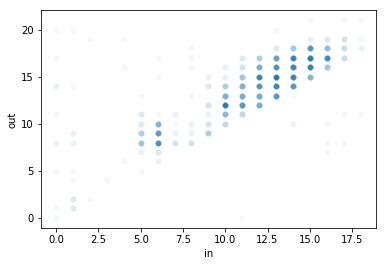

In [131]:
seaborn.scatterplot('in', 'out', data=inout, alpha=.05)

In [126]:
from sklearn.cluster import KMeans

In [127]:
km = KMeans(n_clusters=2)

In [129]:
km.fit(inout)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

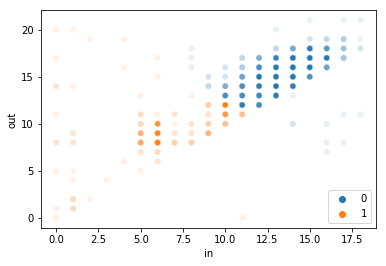

In [135]:
seaborn.scatterplot('in', 'out', data=inout,
                    hue=km.predict(inout), 
                    alpha=.1)  # 불투명도

## R제곱에서 MSE를 분산으로 나누는 이유

In [70]:
x = [1, 2, 3, 4, 5]
y = [1, 3, 5, 3, 7]

In [71]:
df = pd.DataFrame({'x': x, 'y': y})

In [72]:
df

,x,y
0,1,1
1,2,3
2,3,5
3,4,3
4,5,7


In [74]:
df['y'].mean()

3.8

MSE는 실제와 예측의 차이(오차)를 제곱하여 평균낸 것이다

In [81]:
np.mean((df['y'] - df['x']) ** 2 )

2.0

분산은 실제와 평균의 차이를 제곱하여 평균낸 것이므로, 모든 예측을 평균으로 한 경우의 MSE와 같다.

In [80]:
np.mean((y - df['y'].mean()) ** 2)

4.16

모든 예측을 중간값으로 할 수도 있으나 평균에 비해 MSE가 크게 된다.

In [79]:
np.mean((y - df['y'].median()) ** 2)

4.8